# News API

In [30]:
import requests
import pandas as pd 
import numpy as np 

In [31]:
API_KEY = "e041a51fc00b4ee1bd6fed3b6664a9b2"

In [32]:
# Specify URL
# url = "https://newsapi.org/v2/top-headlines"
url = "https://newsapi.org/v2/everything"

In [33]:
params = {
    'q': "news",
    'apikey': API_KEY
}

response = requests.get(url, params=params)
response

<Response [200]>

In [34]:
data = response.json()
data 

{'status': 'ok',
 'totalResults': 239344,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Emma Roth',
   'title': 'iFixit has good news and bad news about the iPhone 15 Pro Max’s repairability',
   'description': 'iFixit has completed its teardown of the iPhone 15 Pro Max. It found that while the device has a more repairable design, software limitations make it more difficult to replace parts.',
   'url': 'https://www.theverge.com/2023/9/25/23888952/ifixit-iphone-15-pro-max-teardown-repairability',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/p0OYGhkr5rH8RfdvyPukB5Ittd8=/0x0:2476x1510/1200x628/filters:focal(1238x755:1239x756)/cdn.vox-cdn.com/uploads/chorus_asset/file/24950571/ifixit_iphone_15_teardown.png',
   'publishedAt': '2023-09-25T13:45:00Z',
   'content': 'iFixit has good news and bad news about the iPhone 15 Pro Maxs repairability\r\niFixit has good news and bad news about the iPhone 15 Pro Maxs repairability\r\n / iFixits teardown shows th

In [35]:
df_arr = []
if response.status_code == 200:
    data = response.json()
    for each in data['articles']:
        temp = []
        temp.append(each['publishedAt'])
        temp.append(each['source']['name'])
        temp.append(each['author'])
        temp.append(each['title'])
        temp.append(each['description'])
        temp.append(each['content'])
        temp.append(each['url'])
        df_arr.append(temp)
    
else:
    print("Error:", response.status_code)

In [36]:
df = pd.DataFrame(df_arr, columns=['publishedAt', 'source', 'author','title','description','content','url'])

In [37]:
df.head()

,publishedAt,source,author,title,description,content,url
0,2023-09-25T13:45:00Z,The Verge,Emma Roth,iFixit has good news and bad news about the iP...,iFixit has completed its teardown of the iPhon...,iFixit has good news and bad news about the iP...,https://www.theverge.com/2023/9/25/23888952/if...
1,2023-09-20T14:00:00Z,The Verge,Jennifer Pattison Tuohy,All the news from Amazon’s September 2023 prod...,"Amazon’s big devices and services event, where...",Amazon is kicking off its annual fall product ...,https://www.theverge.com/2023/9/20/23881164/am...
2,2023-09-12T15:30:00Z,The Verge,Jess Weatherbed,iPhone 15 event: all the news on Apple’s new p...,Apple’s next big event takes place on Septembe...,"Filed under:\r\nByEmma Roth, a news writer who...",https://www.theverge.com/2023/9/12/23862837/ip...
3,2023-09-08T20:24:13Z,The Verge,Jay Peters,Roblox: all the news about the popular social ...,"Roblox is a massive app, and it’s becoming an ...","Roblox is a massive app as of September 2023, ...",https://www.theverge.com/23864790/roblox-news-...
4,2023-09-22T19:00:00Z,Gizmodo.com,Sabina Graves,"Halloween Event News From Disney Parks, Univer...","From Los Angeles and Las Vegas, to New York Ci...","From Los Angeles and Las Vegas, to New York Ci...",https://gizmodo.com/halloween-theme-parks-hhn-...


In [38]:
len(df)

100

In [42]:
# checking null values
df.isna().sum()

publishedAt    0
source         0
author         1
title          0
description    0
content        0
url            0
dtype: int64

In [44]:
# imputing the null valued data
df = df.dropna()

In [45]:
# finding null values
df.isna().sum()

publishedAt    0
source         0
author         0
title          0
description    0
content        0
url            0
dtype: int64

In [46]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [47]:
# Function to create a wordcloud
def create_wordcloud(x):
    # Combine all names into a single string
    all_names = ' '.join(df[x])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_names)

    # Display the Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

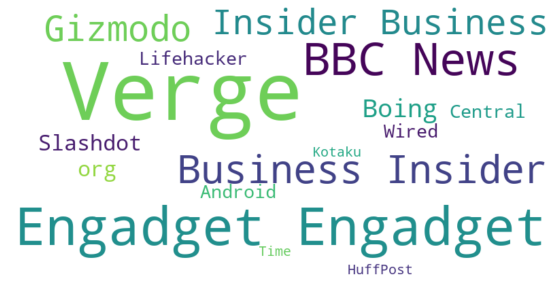

In [48]:
# word cloud of the news sources
create_wordcloud('source')

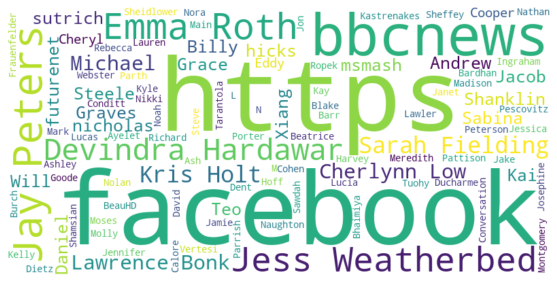

In [49]:
# word cloud of the news authors
create_wordcloud('author')

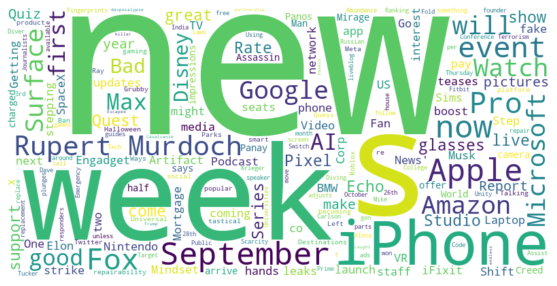

In [50]:
# word cloud of the news title
create_wordcloud('title')

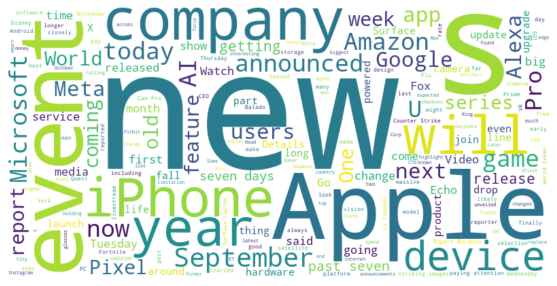

In [51]:
# word cloud of the news description
create_wordcloud('description')

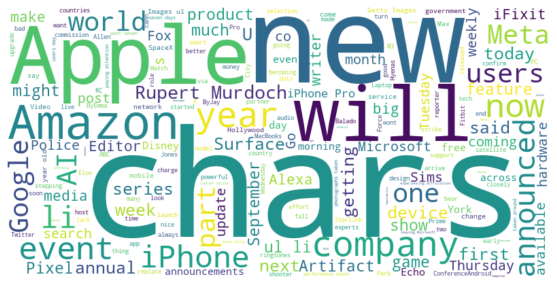

In [52]:
# word cloud of the news content
create_wordcloud('content')